In [28]:
import json
import pandas as pd
with open("fixture_with_trends.json") as f:
  fixture = json.loads(f.read())["data"]

In [29]:
def get_each_minute(data):
  analyses = {int(i["minute"]): int(i["amount"]) for i in data["analyses"]}
  stack = [0]*100
  count = 0
  for i in range(100):
    if analyses.get(i):
      count = analyses[i]
    stack[i] = count
  return stack

def get_momentum(minute_data):
  shots_on_target = minute_data["on_target"]
  shots_off_target = minute_data["off_target"]
  dangerous_attacks = minute_data["dangerous_attacks"]
  possession = minute_data["possession"]
  momentum_team = []
  for i in range(90):
    on_target_count = shots_on_target[i]
    off_target_count = shots_off_target[i]
    dang_attacks_count = dangerous_attacks[i]
    possession_count = possession[i]
    if i > 10:
      on_target_count -= shots_on_target[i-10]
      off_target_count -= shots_off_target[i-10]
      dang_attacks_count -= dangerous_attacks[i-10]
    minute_momentum = (on_target_count*12 + off_target_count * 8 + dang_attacks_count * 2+ possession_count//5)
    momentum_team.append(minute_momentum)
  return momentum_team

def get_team_data(df, team_id):
  df_team = df[df["team_id"]==team_id]
  team_trends = {i["type"]: i for i in df_team.to_dict("records")}
  items = ["possession", "attacks", "dangerous_attacks", "on_target", "off_target", "corners", "goals", "yellowcards", "redcards"]
  minute_data = {item: dict(enumerate(get_each_minute(team_trends[item]))) for item in items}
  momentum = dict(enumerate(get_momentum(minute_data)))
  minute_data.update({"momentum":momentum})
  return minute_data

def get_each_minute_stats():
  home_id = fixture["localteam_id"]
  away_id = fixture["visitorteam_id"]
  trends = fixture["trends"]["data"]
  df = pd.DataFrame(trends)
  df["team_id"]=df["team_id"].astype(int)
  df_home = df[df["team_id"]==home_id]
  df_away = df[df["team_id"]==away_id]
  each_minute_home = get_team_data(df, home_id)

  each_minute_away = get_team_data(df, away_id)
  stats_each_minute = {
    "home": each_minute_home,
    "away": each_minute_away
  }
  return stats_each_minute


In [30]:
get_each_minute_stats()

{'home': {'possession': {0: 65,
   1: 70,
   2: 58,
   3: 65,
   4: 70,
   5: 73,
   6: 65,
   7: 70,
   8: 68,
   9: 67,
   10: 70,
   11: 65,
   12: 64,
   13: 63,
   14: 61,
   15: 59,
   16: 59,
   17: 65,
   18: 66,
   19: 67,
   20: 65,
   21: 65,
   22: 52,
   23: 50,
   24: 50,
   25: 50,
   26: 50,
   27: 50,
   28: 48,
   29: 48,
   30: 46,
   31: 42,
   32: 44,
   33: 45,
   34: 45,
   35: 45,
   36: 46,
   37: 46,
   38: 46,
   39: 45,
   40: 44,
   41: 43,
   42: 43,
   43: 41,
   44: 41,
   45: 38,
   46: 40,
   47: 39,
   48: 39,
   49: 39,
   50: 37,
   51: 38,
   52: 37,
   53: 38,
   54: 38,
   55: 37,
   56: 38,
   57: 38,
   58: 38,
   59: 37,
   60: 38,
   61: 38,
   62: 39,
   63: 39,
   64: 40,
   65: 39,
   66: 39,
   67: 39,
   68: 39,
   69: 39,
   70: 39,
   71: 40,
   72: 40,
   73: 40,
   74: 39,
   75: 39,
   76: 39,
   77: 39,
   78: 39,
   79: 39,
   80: 40,
   81: 40,
   82: 40,
   83: 40,
   84: 40,
   85: 40,
   86: 40,
   87: 40,
   88: 40,
   89: 40

In [19]:
minute = fixture["time"]["minute"]

In [20]:
momentum_home = get_momentum(df, home_id)
momentum_away = get_momentum(df, away_id)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [13]:
for i in range(minute+1, 90):
  momentum_home[i] = None
  momentum_away[i] = None

In [14]:
momentum_home

[0,
 11,
 10,
 9,
 11,
 14,
 22,
 21,
 22,
 22,
 22,
 21,
 22,
 21,
 20,
 17,
 8,
 9,
 24,
 23,
 25,
 25,
 23,
 23,
 23,
 23,
 25,
 25,
 11,
 13,
 12,
 14,
 14,
 14,
 16,
 23,
 28,
 28,
 28,
 28,
 28,
 26,
 26,
 26,
 24,
 33,
 24,
 24,
 24,
 22,
 24,
 24,
 32,
 32,
 32,
 18,
 18,
 25,
 24,
 24,
 22,
 22,
 18,
 20,
 20,
 20,
 20,
 16,
 16,
 16,
 16,
 16,
 14,
 12,
 12,
 26,
 26,
 24,
 27,
 27,
 26,
 26,
 24,
 26,
 29,
 15,
 17,
 16,
 14,
 14]

<AxesSubplot:>

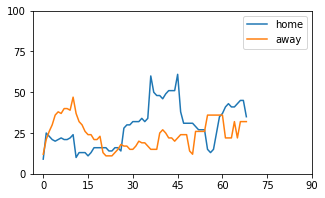

In [14]:
df = pd.DataFrame(zip(momentum_home, momentum_away), columns=["home", "away"])
# plot the pivoted dataframe; if the column names aren't colors, remove color=df.columns
df.plot( figsize=(5, 3), xticks=range(0,100,15), yticks=range(0,110,25))

In [3]:
import json

In [2]:
json.dumps({1:2})

'{"1": 2}'

In [4]:
with open("rest.json") as f:
  fixture = json.loads(f.read())

In [7]:
fixture

{'_id': {'$oid': '61a5764e2d952a7e3edb117f'},
 'fixture_id': 18156714,
 'added_time': None,
 'aggregate_id': None,
 'away_formation': '3-4-2-1',
 'away_id': 277,
 'away_logo': 'https://cdn.sportmonks.com/images/soccer/teams/21/277.png',
 'away_name': 'RB Leipzig',
 'away_position': 8,
 'cards_json': [{'id': {'$numberLong': '18156714004'},
   'team_id': '1079',
   'type': 'yellowcard',
   'fixture_id': 18156714,
   'player_id': 31907,
   'player_name': 'R. Khedira',
   'minute': 64,
   'extra_minute': None,
   'reason': None,
   'on_pitch': None},
  {'id': {'$numberLong': '18156714006'},
   'team_id': '277',
   'type': 'yellowcard',
   'fixture_id': 18156714,
   'player_id': 785998,
   'player_name': 'D. Szoboszlai',
   'minute': 65,
   'extra_minute': None,
   'reason': None,
   'on_pitch': None}],
 'corners_json': [{'id': {'$numberLong': '4423612618'},
   'team_id': 1079,
   'fixture_id': 18156714,
   'minute': 6,
   'extra_minute': None,
   'comment': '1st Corner'},
  {'id': {'$numbe

In [8]:
stats =[]
for i in range(90):
  stats.append([])


In [10]:
momentum=  {
        "0": 10,
        "1": 10,
        "2": 10,
        "3": 12,
        "4": 14,
        "5": 16,
        "6": 14,
        "7": 15,
        "8": 14,
        "9": 16,
        "10": 20,
        "11": 20,
        "12": 31,
        "13": 30,
        "14": 36,
        "15": 38,
        "16": 38,
        "17": 52,
        "18": 64,
        "19": 62,
        "20": 60,
        "21": 60,
        "22": 48,
        "23": 52,
        "24": 44,
        "25": 40,
        "26": 45,
        "27": 43,
        "28": 35,
        "29": 49,
        "30": 49,
        "31": 61,
        "32": 61,
        "33": 57,
        "34": 57,
        "35": 63,
        "36": 59,
        "37": 47,
        "38": 43,
        "39": 31,
        "40": 47,
        "41": 35,
        "42": 37,
        "43": 37,
        "44": 37,
        "45": 31,
        "46": 33,
        "47": 33,
        "48": 35,
        "49": 33,
        "50": 17,
        "51": 23,
        "52": 21,
        "53": 21,
        "54": 21,
        "55": 24,
        "56": 21,
        "57": 21,
        "58": 19,
        "59": 33,
        "60": 33,
        "61": 29,
        "62": 29,
        "63": 29,
        "64": 29,
        "65": 27,
        "66": 29,
        "67": 40,
        "68": 56,
        "69": 42,
        "70": 42,
        "71": 40,
        "72": 40,
        "73": 42,
        "74": 42,
        "75": 42,
        "76": 52,
        "77": 54,
        "78": 38,
        "79": 38,
        "80": 40,
        "81": 42,
        "82": 44,
        "83": 42,
        "84": 42
      }

In [11]:
momentum.values()

dict_values([10, 10, 10, 12, 14, 16, 14, 15, 14, 16, 20, 20, 31, 30, 36, 38, 38, 52, 64, 62, 60, 60, 48, 52, 44, 40, 45, 43, 35, 49, 49, 61, 61, 57, 57, 63, 59, 47, 43, 31, 47, 35, 37, 37, 37, 31, 33, 33, 35, 33, 17, 23, 21, 21, 21, 24, 21, 21, 19, 33, 33, 29, 29, 29, 29, 27, 29, 40, 56, 42, 42, 40, 40, 42, 42, 42, 52, 54, 38, 38, 40, 42, 44, 42, 42])

In [ ]:
inplay rules?
prematch rules?

inplay rules?
statistics
odds

premmatch rules?
